<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/buy_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 44.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=742db594297c7d5186df0f2b4e603960c57857d7d6d5c027d7fb4b14adeedaee
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 37.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=e38cef9a275530f27e67c89a958b713de70fc5ec8200631ed8ca21503c2e19b6
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [4]:
stocksymbols = ['AAPL']
startdate = date(2017,8,4)
end_date = date.today()
print(end_date)

def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data


2021-10-15


In [5]:
data = getMyPortfolio(stocksymbols)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168049,82239600
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743191,87481200
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045033,144823600
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277931,104526000
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200
...,...,...,...,...,...,...
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200
2021-10-12,143.229996,143.250000,141.039993,141.509995,141.509995,73035900


In [12]:
#Simple Moving average

data['SMA 30'] = data['Close'].rolling(window = 30).mean()
data['SMA 100'] = data['Close'].rolling(window = 100).mean()
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [13]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168049,82239600,NaN,NaN,NaN,NaN
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743191,87481200,NaN,NaN,NaN,NaN
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045033,144823600,NaN,NaN,NaN,NaN
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277931,104526000,NaN,NaN,NaN,NaN
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700,147.302333,141.4062,NaN,NaN
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200,147.109332,141.5874,NaN,NaN
2021-10-12,143.229996,143.250000,141.039993,141.509995,141.509995,73035900,146.722332,141.7294,NaN,NaN


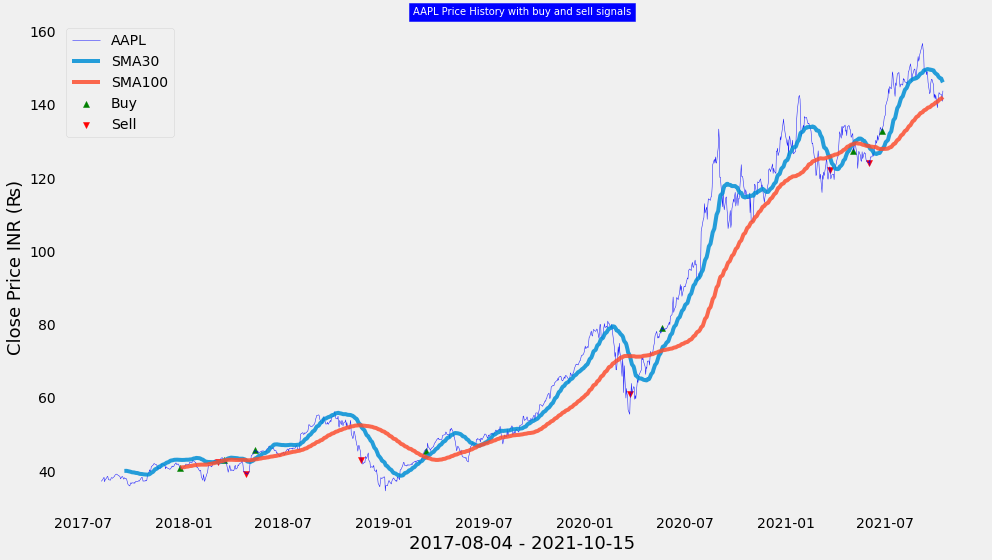

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


In [15]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04,NaN,NaN,NaN
2017-08-07,NaN,NaN,NaN
2017-08-08,NaN,NaN,NaN
2017-08-09,NaN,NaN,NaN
2017-08-10,NaN,NaN,NaN
...,...,...,...
2021-10-08,-1.799631,-0.151572,-1.648058
2021-10-11,-1.696059,-0.038401,-1.657659
2021-10-12,-1.699289,-0.033304,-1.665985


In [16]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168049,82239600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743191,87481200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045033,144823600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277931,104526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700,147.302333,141.4062,NaN,NaN,-1.799631,-0.151572,-1.648058
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200,147.109332,141.5874,NaN,NaN,-1.696059,-0.038401,-1.657659
2021-10-12,143.229996,143.250000,141.039993,141.509995,141.509995,73035900,146.722332,141.7294,NaN,NaN,-1.699289,-0.033304,-1.665985


In [17]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell


In [26]:
sell_df = data.loc[~data['MACD_Sell_Signal_price'].isna(), ['MACD_Sell_Signal_price']]
buy_ddf = data.loc[~data['MACD_Buy_Signal_price'].isna(), ['MACD_Buy_Signal_price']]

In [32]:
sell_df = sell_df.dropna(axis=0).reset_index()
buy_ddf = buy_ddf.dropna(axis = 0).reset_index()

In [35]:
buy_sell_df = pd.concat([buy_ddf, sell_df], axis=1 )
#buy_sell_df

In [36]:
profit = ((buy_sell_df['MACD_Buy_Signal_price'] - buy_sell_df['MACD_Sell_Signal_price'])/buy_sell_df['MACD_Buy_Signal_price'])*100

In [37]:
profit.sum()

-129.37502287503727

In [18]:
MACD_strategy = MACD_Strategy(data, 0.025)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price
Date,,,,,,,,,,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168049,82239600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743191,87481200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045033,144823600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277931,104526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700,147.302333,141.4062,NaN,NaN,-1.799631,-0.151572,-1.648058,NaN,NaN
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200,147.109332,141.5874,NaN,NaN,-1.696059,-0.038401,-1.657659,NaN,NaN
2021-10-12,143.229996,143.250000,141.039993,141.509995,141.509995,73035900,146.722332,141.7294,NaN,NaN,-1.699289,-0.033304,-1.665985,NaN,NaN


In [19]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168049,82239600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743191,87481200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045033,144823600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277931,104526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700,147.302333,141.4062,NaN,NaN,-1.799631,-0.151572,-1.648058,NaN,NaN,True
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200,147.109332,141.5874,NaN,NaN,-1.696059,-0.038401,-1.657659,NaN,NaN,True
2021-10-12,143.229996,143.250000,141.039993,141.509995,141.509995,73035900,146.722332,141.7294,NaN,NaN,-1.699289,-0.033304,-1.665985,NaN,NaN,True


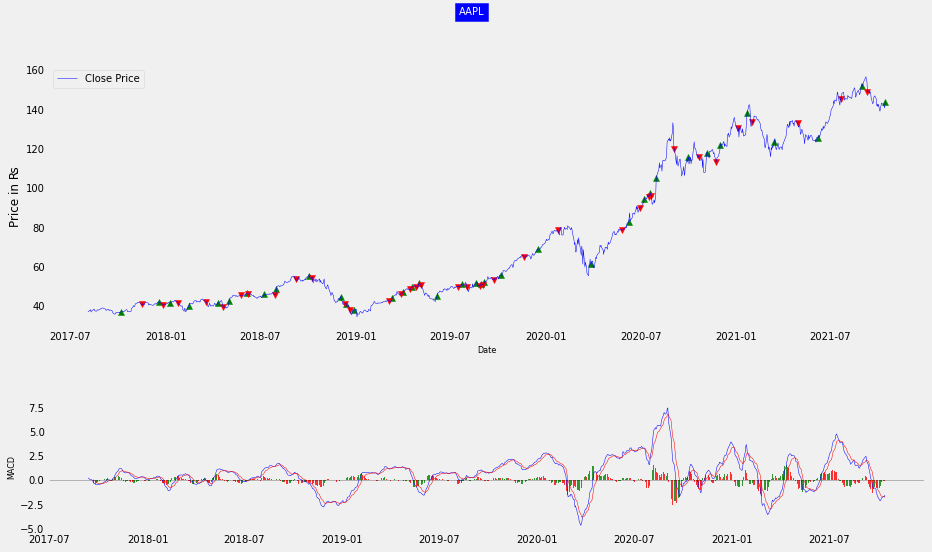

In [20]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()


In [ ]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data


In [ ]:
#storing the function
data = bb_strategy(data)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,,,
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.168053,82239600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.743195,87481200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,39.650002,40.457500,39.567501,40.020000,38.045017,144823600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.277943,104526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,39.974998,40.000000,38.657501,38.830002,37.058712,163217200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,145.470001,145.960007,143.820007,145.369995,145.369995,74150700,149.317666,140.0231,NaN,NaN,-0.885557,-0.653137,-0.232419,NaN,NaN,True,141.780379,149.656999,157.533620,10.526231,0.227865,NaN,NaN
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.910004,108972300,149.010666,140.1448,NaN,NaN,-1.233866,-0.801158,-0.432709,NaN,NaN,False,140.706671,149.096500,157.486329,11.254227,0.071714,NaN,NaN
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002,74602000,148.765333,140.2710,NaN,NaN,-1.419308,-0.789279,-0.630028,NaN,NaN,True,139.932223,148.646500,157.360777,11.724833,0.166266,NaN,NaN


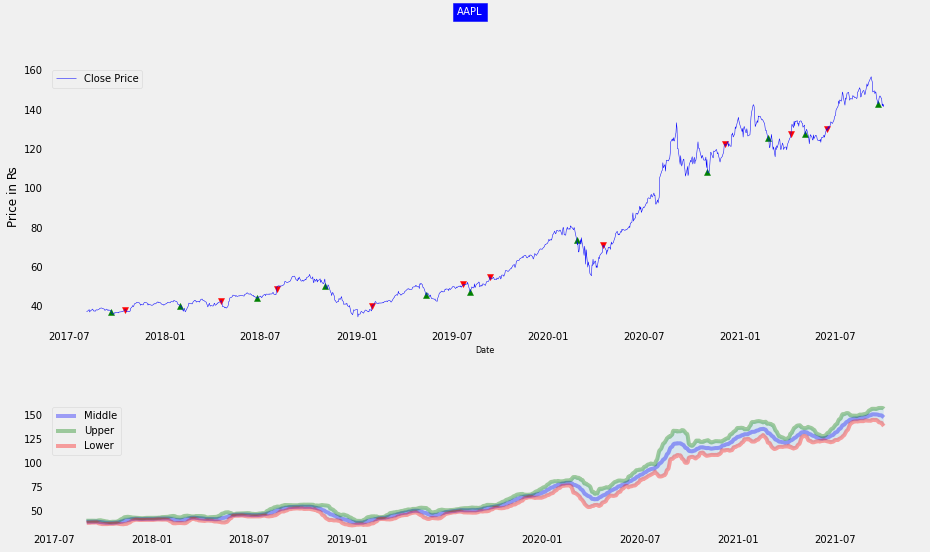

In [ ]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()
